In [61]:
# from __future__ import print_function, division

In [62]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [63]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [64]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

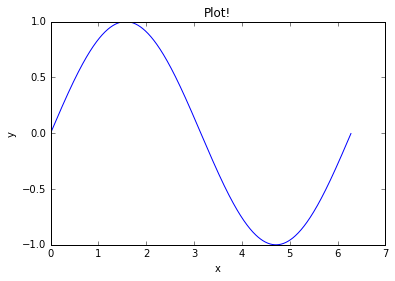

In [65]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)

plot_fn(x, y, title="Plot!")

In [66]:
# TODO then integrate y 
step_size = np.arange(0.001, 0.1, 0.01)
for i in step_size: 
    print("Integration result is: %f" % integrate(y, i))

Integration result is: -0.000001
Integration result is: -0.000012
Integration result is: -0.000023
Integration result is: -0.000034
Integration result is: -0.000044
Integration result is: -0.000055
Integration result is: -0.000066
Integration result is: -0.000077
Integration result is: -0.000088
Integration result is: -0.000099


In [67]:
# TODO now use a np function to integrate y and compare
# using np.trapz to numerically integrate with a trapezoidal Riemann sum 
for i in step_size: 
    print("Integration result with numpy is: %f" % np.trapz(y, dx = i))

Integration result with numpy is: 0.000001
Integration result with numpy is: 0.000006
Integration result with numpy is: 0.000011
Integration result with numpy is: 0.000016
Integration result with numpy is: 0.000021
Integration result with numpy is: 0.000026
Integration result with numpy is: 0.000031
Integration result with numpy is: 0.000036
Integration result with numpy is: 0.000041
Integration result with numpy is: 0.000046


In [68]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
x_2 = np.arange(0, 6*np.pi, 0.01)
y_2 = np.sin(x_2)
difference = np.diff(y_2) 
# want difference[i] = y_2[i] - y_2[i - 1] < 0, difference[i - 1] > 0 for local maxima at y_2[i]  
local_maxima = []
for i in range(len(difference) - 1):
    if difference[i] < 0 and difference[i - 1] > 0: 
        local_maxima.append((x_2[i], y_2[i]))
print(local_maxima)
# want difference[i] > 0, difference[i - 1] < 0 for local minima at y_2[i] 
local_minima = []
for j in range(len(difference) - 1):
    if difference[j] > 0 and difference[j - 1] < 0: 
        local_minima.append((x_2[j], y_2[j]))
print(local_minima)

[(1.5700000000000001, 0.99999968293183461), (7.8500000000000005, 0.99999207330591877), (14.140000000000001, 0.99999598689147196)]
[(4.71, -0.99999714638771797), (11.0, -0.99999020655070348), (17.280000000000001, -0.99999923069749896)]


# Part 2

In [69]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [70]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [71]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.fft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) 
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25) : num_freq] = 0
    
    y_clean_values = np.fft.ifft(low_pass_filter)
    
    return y_clean_values

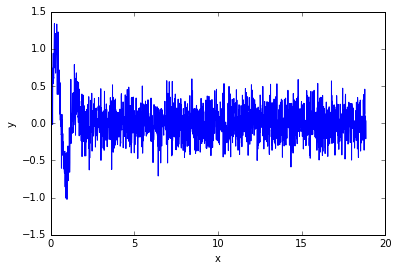

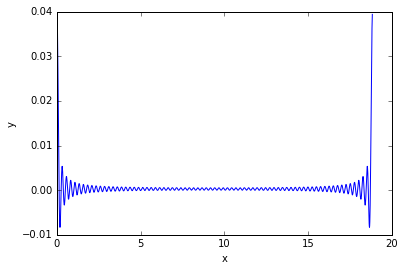

In [72]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
gaussian = noisy_packet(x_2, 5, 1, 0.2)
plot_fn(x_2, gaussian) 
cleaned = clean_data(x_2, gaussian)
#resulting data (after inverse fourier transofrm) is complex--this just plots the real part 
plot_fn(x_2, cleaned)
#looks like this does clear up the noise! 

# Part 3

In [73]:
# TODO mask the arrays, then plot

In [74]:
# TODO try to generate masked noisy data and then clean it